**Name**: *Shubham Tribedi*
**Enrollment Number**: *1811100002037*
**Choice**: *1 (Number:3)*

## Discretisation plus Encoding

What shall we do with the variable after discretisation? should we use the buckets as a numerical variable? or should we use the intervals as categorical variable?

The answer is, you can do either.

If you are building decision tree based algorithms and the output of the discretisation are integers (each integer referring to a bin), then you can use those directly, as decision trees will pick up non-linear relationships between the discretised variable and the target.

If you are building linear models instead, the bins may not necessarily hold a linear relationship with the target. In this case, it may help improve model performance to treat the bins as categories and to one hot encoding, or target guided encodings like mean encoding, weight of evidence, or target guided ordinal encoding.

We can easily do so by combining feature-engine's discretisers and encoders.

### Here, you have to perform equal frequency discretisation followed by target guided orginal encoding using the titanic dataset


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.encoding import OrdinalEncoder

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [ ]:
# load the numerical variables of the Titanic Dataset, i.e., 'age', 'fare', 'survived'

data = pd.read_csv('titanic.csv',usecols=['age', 'fare', 'survived'])

data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [ ]:
# Separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],
    data['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((916, 2), (393, 2))

The variables Age and Fare contain missing data, that you have to fill by extracting a random sample of the variable.

In [ ]:
 # Create a function to fill NA with a random sample


def impute_na(data, variable):

    df = data.copy()

    # random sampling
    df[variable + '_random'] = df[variable]

    # extract the random sample to fill the na
    random_sample = X_train[variable].dropna().sample(
        df[variable].isnull().sum(), random_state=0)

    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable + '_random'] = random_sample

    return df[variable + '_random']

In [ ]:
# replace NA in both  train and test sets

X_train['age'] = impute_na(data, 'age')
X_test['age'] = impute_na(data, 'age')

X_train['fare'] = impute_na(data, 'fare')
X_test['fare'] = impute_na(data, 'fare')

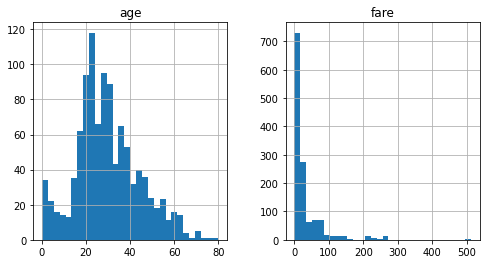

In [ ]:
# Explore the distribution of age

data[['age', 'fare']].hist(bins=30, figsize=(8,4))
plt.show()

## Equal frequency discretisation with Feature-Engine

1.   List item
2.   List item



In [ ]:
# set up the equal frequency discretiser to encode variables
# you need them returned as objects for feature-engine
# Tips: use EqualFrequencyDiscretiser with return_object=True

disc = EqualFrequencyDiscretiser(q=10, return_object=True,variables=['age', 'fare'])

disc.fit(X_train)


# then transform train and text

train_t= disc.transform(X_train)
test_t= disc.transform(X_test)

In [ ]:
# train head
train_t.head()

,age,fare
501,0,5
588,0,6
402,5,4
1193,2,1
686,2,1


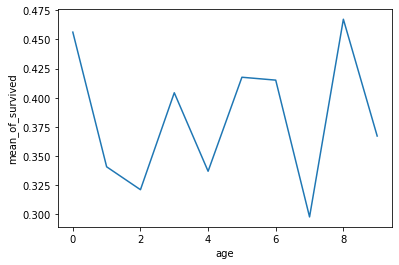

In [ ]:
y_train.groupby(train_t['age']).mean().plot(ylabel='mean_of_survived')

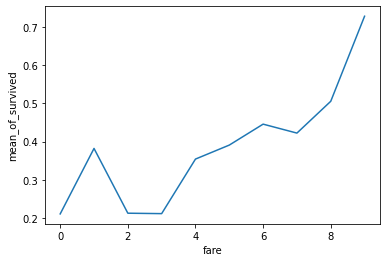

In [ ]:
# Explore if the bins have a linear relationship
# with the target age:

y_train.groupby(train_t['fare']).mean().plot(ylabel='mean_of_survived')

None of the variables show a monotonic relationship between the intervals of the discrete variable and the mean of survival. We can encode the intervals to return a monotonic relationship:

# Ordinal encoding with Feature-Engine

In [ ]:
# Use OrdinalEncoder and transform the train test set

encoder = OrdinalEncoder()
encoder.fit(train_t,y_train)

OrdinalEncoder(encoding_method='ordered', ignore_format=False, variables=None)

In [ ]:
# in the map, you have to map bin to position
#tips: use encoder_dict

train_ord= encoder.transform(train_t)
test_ord= encoder.transform(test_t)
encoder.encoder_dict_

{'age': {0: 8, 1: 3, 2: 1, 3: 5, 4: 2, 5: 7, 6: 6, 7: 0, 8: 9, 9: 4},
 'fare': {0: 0, 1: 4, 2: 2, 3: 1, 4: 3, 5: 5, 6: 7, 7: 6, 8: 8, 9: 9}}

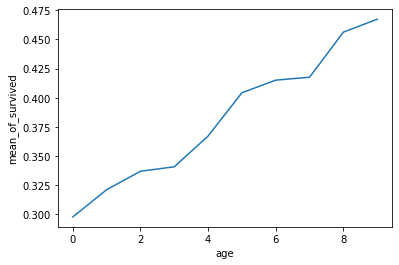

In [ ]:
# Now check for the monotonic relationship between variables and target age
y_train.groupby(train_ord['age']).mean().plot(ylabel='mean_of_survived')

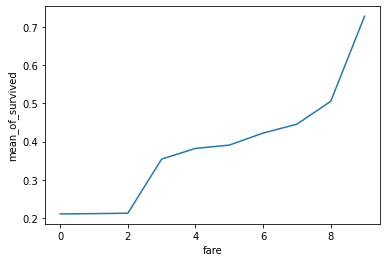

In [ ]:
# Now check for the monotonic relationship between variables and target fare
y_train.groupby(train_ord['fare']).mean().plot(ylabel='mean_of_survived')

Now we obtained a monotonic relationship between variables and target.